## Imports


In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import plotly.graph_objs as go
from plotly import subplots
import plotly.offline as py
import functools

## Read Data


In [3]:
read_file = pd.read_excel(r'..\data\dataX.xlsx')
headerList = ['sentence']
read_file.to_csv (r'..\data\data.csv', header=headerList, index=False)
data = pd.read_csv('..\data\data.csv')

In [4]:
data.head()

,sentence
0,"ძეგლთა დაცვის ეროვნულ სააგენტოში აცხადებენ, რო..."
1,საქართველოს კულტურული მემკვიდრეობისა და ძეგლთა...
2,"„გაირკვა, რომ აქ არც მეჩეთი და არც ეკლესია არ ..."
3,"კვლევის ავტორი არ გამორიცხავს, რომ აქ სამხედრო..."
4,"შეკითხვაზე, რამდენად შესაძლებელია რომ ეს რელიგ..."


## Filter/Clean Data


In [5]:
# this method removes all extra symbols - every non georgian symbol, including digits
import re
def preprocess(sentences):
    processed=[] 
    for text in sentences:
        text=re.sub(r'[^ა-ჰ0-9]'," ",text) 
        text=re.sub(r'[0-9]{1}',"#",text) 
        text=re.sub(r'[0-9]{2}','##',text)  
        text=re.sub(r'[0-9]{3}','###',text)
        text=re.sub(r'[0-9]{4}','####',text)
        text=re.sub(r'[0-9]{5,}','#####',text)
        num_words = len(re.findall(r'\w+', text))
        if num_words > 2:
            processed.append(text)
    return processed

In [6]:
data = preprocess(data['sentence'])

In [7]:
data[:50]

['ძეგლთა დაცვის ეროვნულ სააგენტოში აცხადებენ  რომ მათ მიერ  სამხრეთის კარიბჭესთვის  მოწოდებული ინფორმაცია  იმის შესახებ რომ ახალციხის არქივის ეზოში აღმოჩენილი შენობა საკულტო ნაგებობა იყო არასწორია და საბოლოოდ დადგინდა  რომ აქ ტრადიციული მესხური საცხოვრებელი იყო',
 'საქართველოს კულტურული მემკვიდრეობისა და ძეგლთა დაცვის ეროვნულ სააგენტოში აცხადებენ რომ მათ მიერ მოწოდებული პირველადი ინფორმაცია ახალციხის არქივის ეზოში აღმოჩენის შესახებ ნაჩქარევი იყო',
 ' გაირკვა  რომ აქ არც მეჩეთი და არც ეკლესია არ ყოფილა  ჩვეულებრივი საყოფაცხოვრებო დანიშნულების შენობა  ტრადიციული მესხური საცხოვრისი იყო     გვითხრეს კულტურული მემკვიდრეობისა და ძეგლთა დაცვის ეროვნული სააგენტოს საზოგადოებასთან ურთიერთობის სამსახურში',
 'კვლევის ავტორი არ გამორიცხავს  რომ აქ სამხედრო  ან თუნდაც რელიგიური დანიშნულების ობიექტიც ყოფილიყო',
 'შეკითხვაზე  რამდენად შესაძლებელია რომ ეს რელიგიური დანიშნულების ობიექტი მეჩეთი ყოფილიყო  რომლის ნანგრევებზეც ტაძარი აშენდა  ჩოხელი გვპასუხობს ',
 ' გადაჭრით თქმა ძალიან ძნელია  მანდ ისეთი მდ

Here we can see that all sentences are clear

In [8]:
print(f'Total Rows - {len(data)}')

Total Rows - 859124


## Save Data


In [9]:
data_df = pd.DataFrame(data, columns =['sentence'])
data_df.to_csv(r'..\data\data.csv', index=False, encoding='utf-8-sig')

## Analysis

In [10]:
data_df.head()

,sentence
0,ძეგლთა დაცვის ეროვნულ სააგენტოში აცხადებენ რო...
1,საქართველოს კულტურული მემკვიდრეობისა და ძეგლთა...
2,გაირკვა რომ აქ არც მეჩეთი და არც ეკლესია არ ...
3,კვლევის ავტორი არ გამორიცხავს რომ აქ სამხედრო...
4,შეკითხვაზე რამდენად შესაძლებელია რომ ეს რელიგ...


<h3>Sentence Length Distribution</h3>

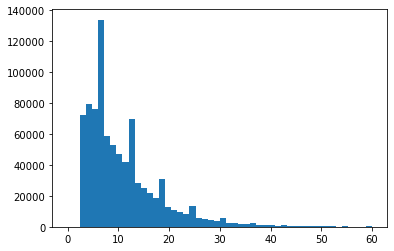

In [11]:
sentence_word_count = [len(sentence.split()) for sentence in data_df['sentence']]
_ =plt.hist(sentence_word_count, range=(0,60), bins=50)

In [12]:
print(f'Average question word count - {sum(sentence_word_count)/len(sentence_word_count)}')

Average question word count - 10.880794856155806


From the plot we can see that avg length of sentences is 8-13 words

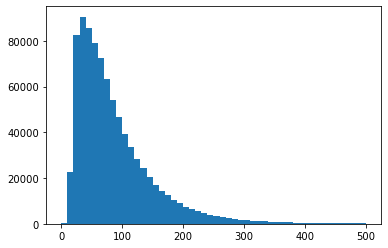

In [13]:
sentence_char_length = [len(sentence) for sentence in data_df['sentence']]
_ =plt.hist(sentence_char_length, range=(0,500), bins=50)

In [14]:
print(f'Average question char count - {sum(sentence_char_length)/len(sentence_char_length)}')

Average question char count - 87.19349360511404


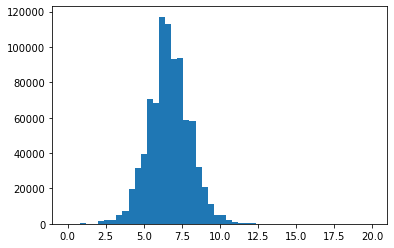

In [15]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

sentence_avg_word_length = [avg_word(sentence) for sentence in data_df['sentence']]
_ =plt.hist(sentence_avg_word_length, range=(0,20), bins=50)

In [16]:
print(f'Average question word count - {sum(sentence_avg_word_length)/len(sentence_avg_word_length)}')

Average question word count - 6.6454350064266565


<h3>Most Frequent Words </h3>


In [17]:
STOPWORDS =  list(pd.read_csv("https://raw.githubusercontent.com/rudolferemyan/georgian_nlp/master/stop_words/GEORGIAN_STOP_WORDS_LIST.txt", header=None, nrows = 224)[0])
STOPWORDS += ['#', '##', '###', '####']

def generate_1_grams(text):
    return [token for token in text.lower().split() if token not in STOPWORDS ] 

freq_dict = defaultdict(int)
for sent in data_df["sentence"]:
    for word in generate_1_grams(sent):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Word", "Word Count"]
fd_sorted.head(20)        

,Word,Word Count
0,ეს,48780
1,ამ,45270
2,ის,43746
3,არის,35337
4,იყო,30242
5,საქართველოს,29029
6,წლის,27792
7,რა,27336
8,მე,25129
9,მისი,22438
